In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap = None):
    fig = plt.figure(figsize = (6, 6))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

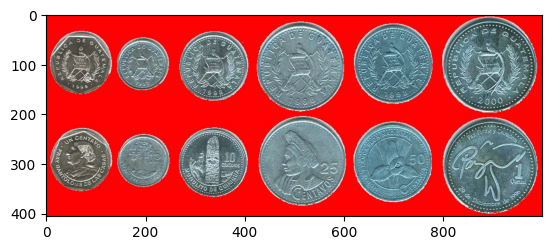

In [17]:
monedas = cv2.imread('../resources/img/monedas.jpg')
plt.imshow(monedas)

## Aplicamos un blur a la imagen para evitar que los relieves internos interfieran con el algoritmo 

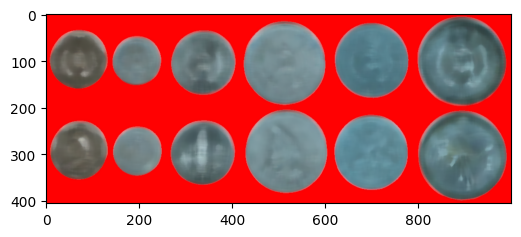

In [18]:
monedas_blur = cv2.medianBlur(monedas, 15)
display(monedas_blur)

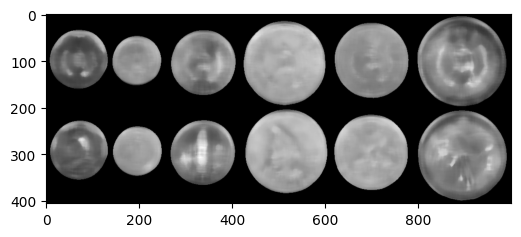

In [19]:
monedas_blur_gris = cv2.cvtColor(monedas_blur, cv2.COLOR_BGR2GRAY)
display(monedas_blur_gris, cmap = 'gray')

## Aplicamos un Binary Threshold

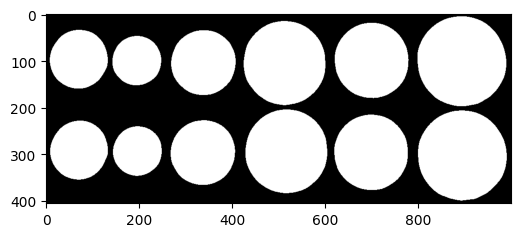

In [22]:
ret , thresh1 = cv2.threshold(monedas_blur_gris, 50, 255, cv2.THRESH_BINARY)
display(thresh1, cmap = 'grey')

## Buscamos los contornos

In [23]:
contornos, jerarquia = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

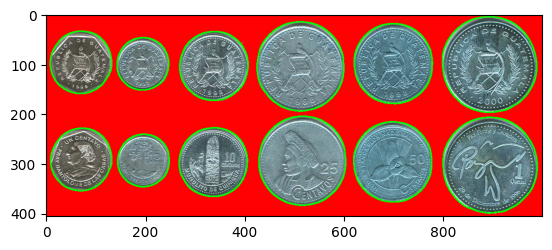

In [25]:
# contornos_internos = np.zeros(img.shape)
for i in range(len(contornos)):
    if jerarquia[0][i][3] == -1: # Si jerarquia es igual a -1 son contornos externos.
        cv2.drawContours(monedas, contornos, i, (0, 255, 0), 2)
plt.imshow(monedas)

# WhaterShed

Es muy util cuando queremos ver el contorno de objetos que estan muy juntos, lo cual a otros modelos se les dificulta.

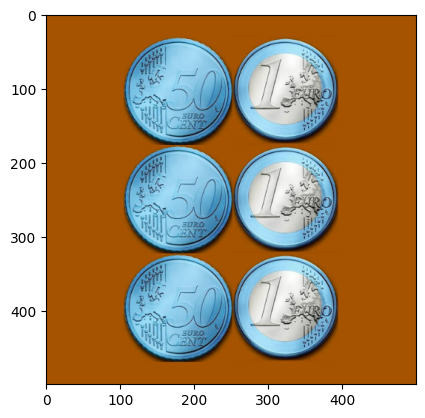

In [34]:
monedas = cv2.imread('../resources/img/monedas.png')
plt.imshow(monedas)

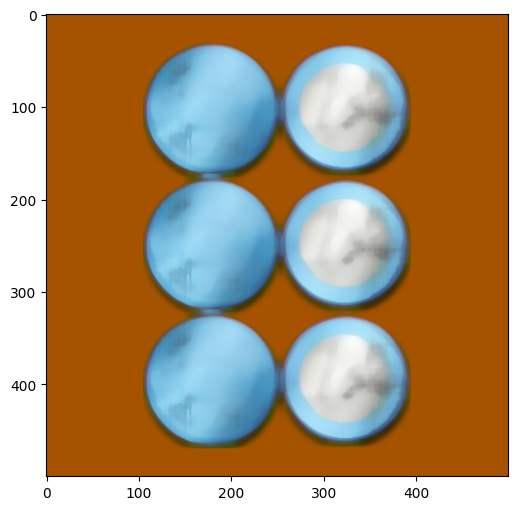

In [35]:
monedas_blur = cv2.medianBlur(monedas, 15)
display(monedas_blur)

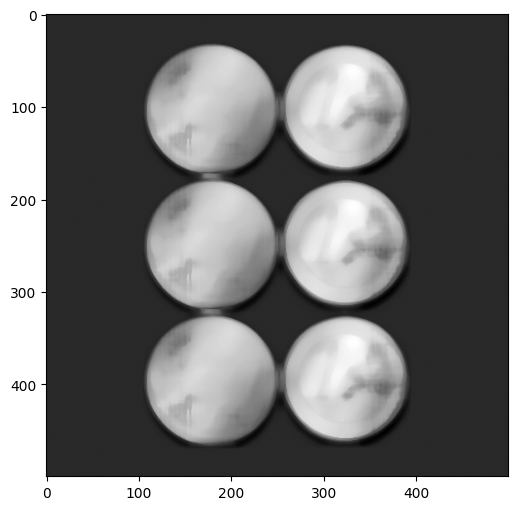

In [36]:
monedas_blur_gris = cv2.cvtColor(monedas_blur, cv2.COLOR_BGR2GRAY)
display(monedas_blur_gris, cmap = 'gray')

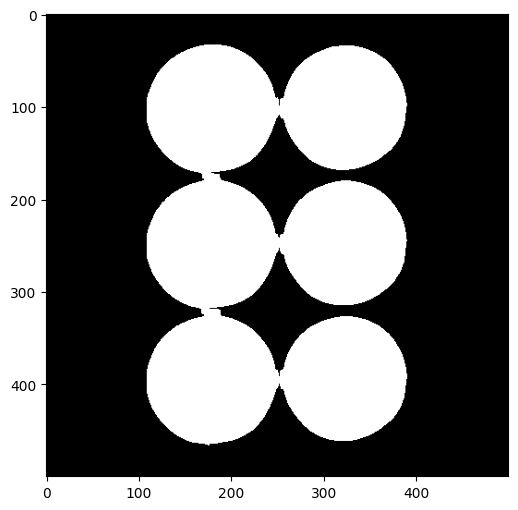

In [38]:
ret , thresh1 = cv2.threshold(monedas_blur_gris, 100, 255, cv2.THRESH_BINARY)
display(thresh1, cmap = 'grey')

## Quitar Ruido si es necesario

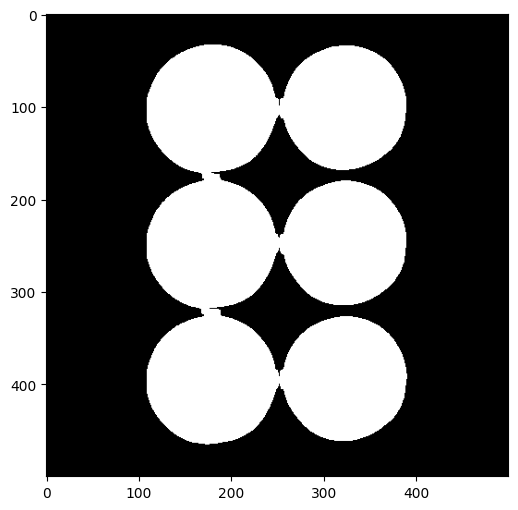

In [39]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel, iterations = 2)
display(opening, cmap = 'grey')

In [48]:
opening = cv2.dilate(opening, kernel, iterations = 1)

## Distance Transform
Permite calcular la distancia de cada píxel a la región más cercana de un objeto o borde dentro de una imagen binaria.

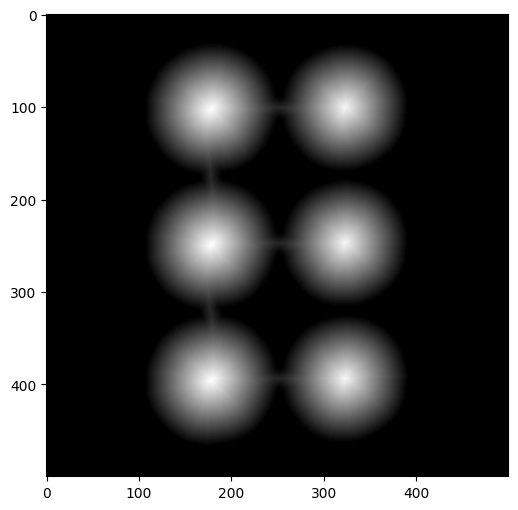

In [49]:
dist_trans = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
display(dist_trans, cmap = 'grey')

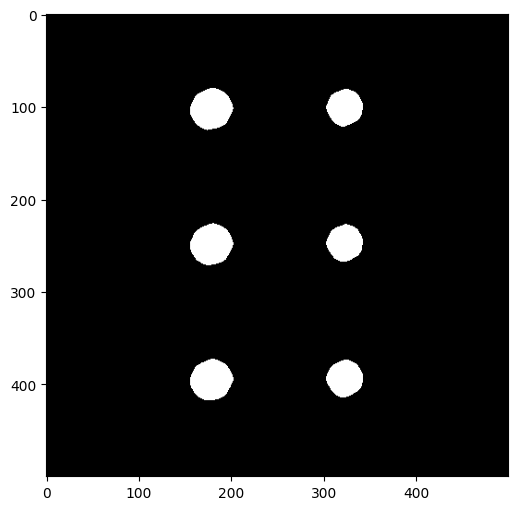

In [50]:
ret, thresh2 = cv2.threshold(dist_trans, 0.7 * dist_trans.max(), 255, 0)
display(thresh2, cmap = 'grey')

## Zona desconocida

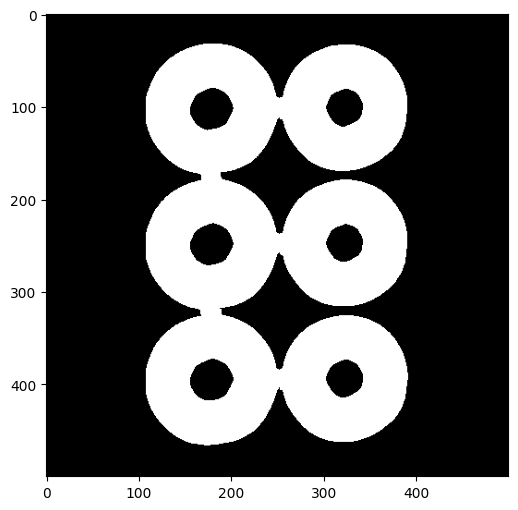

In [51]:
thresh2 = np.uint8(thresh2)
desc = cv2.subtract(opening, thresh2)
display(desc, cmap = 'grey')

## Markers

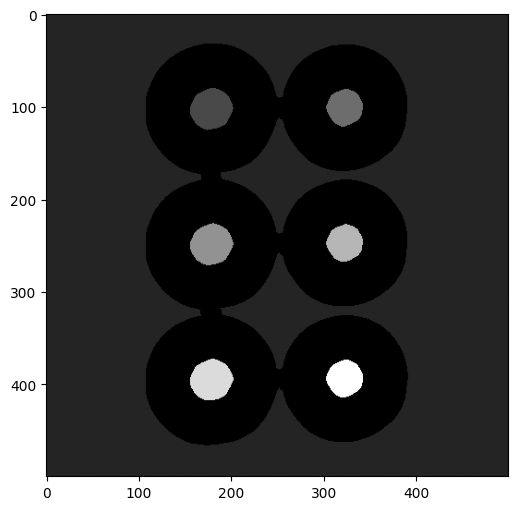

In [52]:
ret, markers = cv2.connectedComponents(thresh2)
markers = markers + 1
markers[desc == 255] = 0
display(markers, cmap = 'grey')

## Aplicar el algoritmo de Watershed

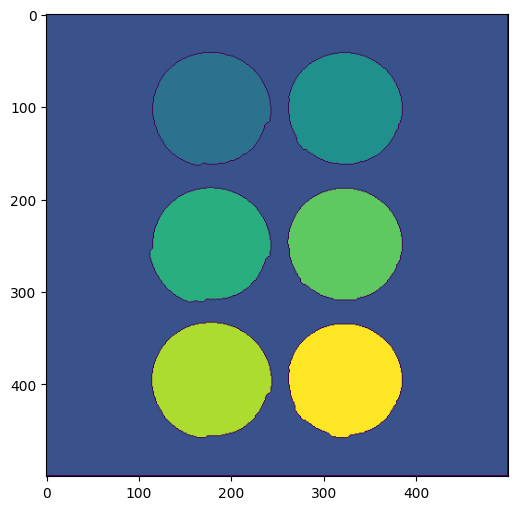

In [53]:
markers = cv2.watershed(monedas, markers)
display(markers)

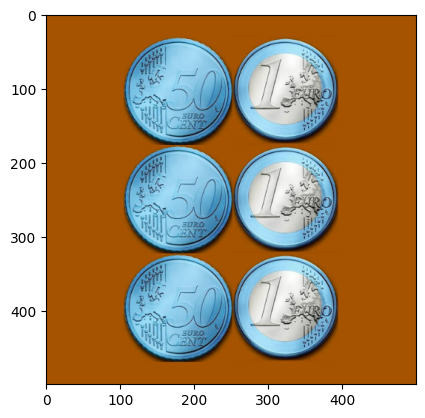

In [55]:
monedas = cv2.imread('../resources/img/monedas.png')
plt.imshow(monedas)

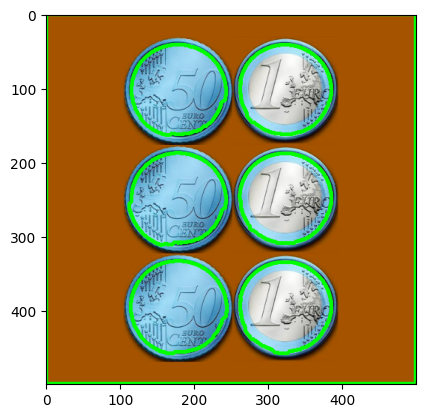

In [56]:
contornos, jerarquia = cv2.findContours(markers, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contornos)):
    if jerarquia[0][i][3] == -1: # Si jerarquia es igual a -1 son contornos externos.
        cv2.drawContours(monedas, contornos, i, (0, 255, 0), 2)
plt.imshow(monedas)